In [1]:
import pyshark
import nest_asyncio
nest_asyncio.apply()
import matplotlib.pyplot as plt

In [2]:
cap_deccan = pyshark.FileCapture("10s_Saran/deccan.pcap")
cap_jagran = pyshark.FileCapture("10s_Saran/jagran.pcap")
cap_mit = pyshark.FileCapture("10s_Saran/mit.pcap")
cap_sinu = pyshark.FileCapture("10s_Saran/sinu.pcap")
cap_usach = pyshark.FileCapture("10s_Saran/usach.pcap")

In [4]:
def dns_time(capture):
    curr_id = ''
    time_in = 0
    time_out = 0
    # p_in = 0
    # p_out = 0

    i = 0
    while True:
        pp = capture[i]
        if "DNS" in pp:
            curr_id = pp.dns.id
            time_in = float(pp.frame_info.time_relative)
            # p_in = i
            break
        i += 1

    while True:
        i += 1
        pp = capture[i]
        if "DNS" in pp and pp.dns.id == curr_id:
            time_out = float(pp.frame_info.time_relative)
            # p_out = i
            break
    
    return time_out - time_in

print("DECCAN : "+ str(dns_time(cap_deccan)))
print("JAGRAN : "+ str(dns_time(cap_jagran)))
print("MIT    : "+ str(dns_time(cap_mit)))
print("USACH  : "+ str(dns_time(cap_usach)))
print("SINU   : "+ str(dns_time(cap_sinu)))



DECCAN : 0.558804
JAGRAN : 0.653601
MIT    : 0.455497
USACH  : 1.096968
SINU   : 1.109484


In [5]:
def ttfb(capture):
    curr_id = ''
    time_in = 0
    time_out = 0
    p_in = 0
    p_out = 0
    
    i = 0
    while True:
        pp = capture[i]
        if "DNS" in pp:
            time_in = float(pp.frame_info.time_relative)
            p_in = i
            # print("p_in  : "+str(p_in))
            break
        i += 1

    while True:
        i += 1
        pp = capture[i]
        if "tls" in pp and  hasattr(pp.tls,"app_data") :
            time_out = float(pp.frame_info.time_relative)
            p_out = i
            # print("p_out : "+str(p_out))
            break
    return time_out - time_in

print("TTFB for DECCAN = "+ str(ttfb(cap_deccan)))
print("TTFB for JAGRAN = "+ str(ttfb(cap_jagran)))
print("TTFB for MIT    = "+ str(ttfb(cap_mit)))
print("TTFB for USACH  = "+ str(ttfb(cap_usach)))
print("TTFB for SINU   = "+ str(ttfb(cap_sinu)))
# ttfb(cap_deccan)
# cap_deccan[24].tls.field_names
# cap_deccan[24].tls.app_data
# x = 1.891187
# y= int(x*10)
# print("y = "+str(y))

TTFB for DECCAN = 0.871187
TTFB for JAGRAN = 1.09323
TTFB for MIT    = 0.561762
TTFB for USACH  = 2.228492
TTFB for SINU   = 1.807436


at i = 1, src_ip : 192.168.133.203
no of downlink packs = 19


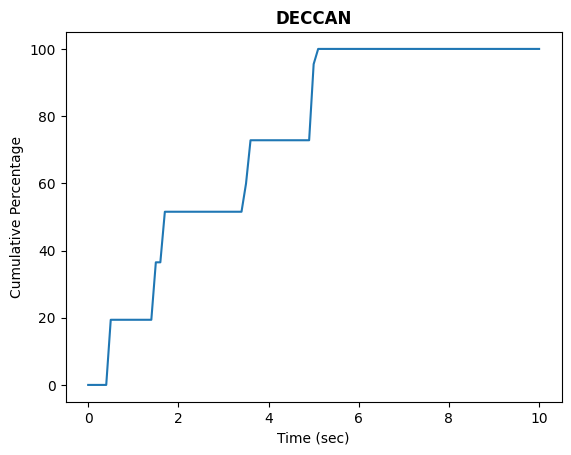

at i = 1, src_ip : 192.168.133.203
no of downlink packs = 86


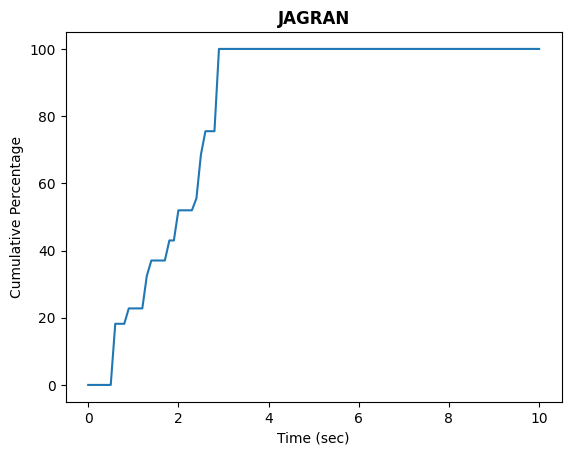

at i = 1, src_ip : 2401:4900:2300:1aaf:9b4c:d377:137:8bfb
no of downlink packs = 548


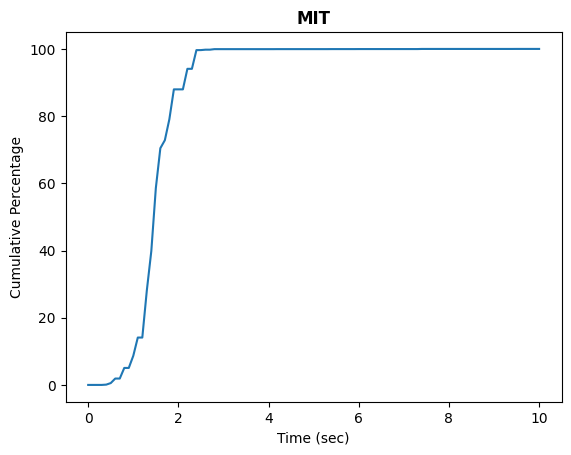

at i = 8, src_ip : 192.168.0.50
no of downlink packs = 3786


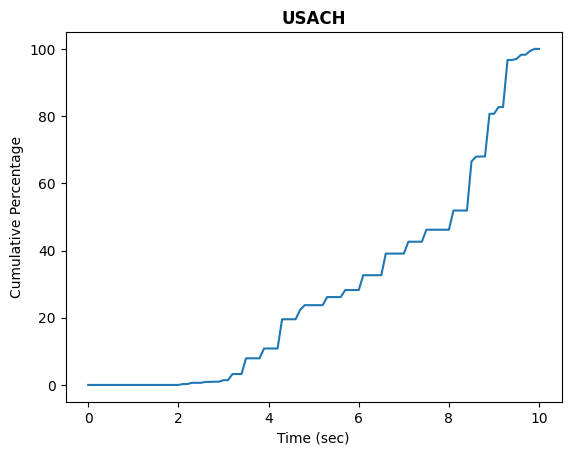

at i = 3, src_ip : 192.168.133.203
no of downlink packs = 1472


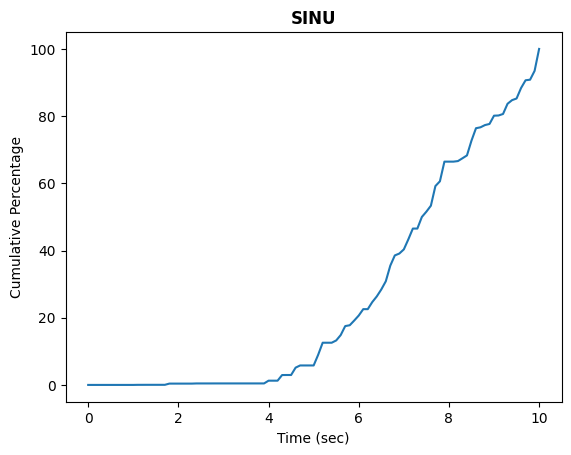

In [6]:
def cum_plot(capture,name):
    src_ip = "_"
    i=0
    for pp in capture:
        i+=1
        # print(i)
        if "dns" in pp and "ip" in pp :
            src_ip = pp.ip.src
            break
        elif "dns" in pp and "ipv6" in pp:
            src_ip = pp.ipv6.src
            break
        
    # print("at i = "+str(i)+", src_ip : "+src_ip)
    
    downlink_packs=[]
    for pp in capture:
        if("ip" in pp ):
            if pp.ip.dst == src_ip:
                downlink_packs.append(pp)
        if("ipv6" in pp ):
            if pp.ipv6.dst == src_ip:
                downlink_packs.append(pp)


    maxval = 10

    print("no of downlink packs = "+str(len(downlink_packs)))

    plot_kbps = {num / 10: 0 for num in range(int((maxval + 0.1) * 10))}
    
    for pp in downlink_packs:
        ts = float(pp.frame_info.time_relative) 
        k=int(ts*10)/10
        if(k<10.1):
            plot_kbps[k] +=int(pp.length)

    cumulative_sum = 0
    for key in sorted(plot_kbps.keys()):
        cumulative_sum += plot_kbps[key]
        plot_kbps[key] = cumulative_sum

    tot = plot_kbps[10.0]
    if(tot==0): print("TOT = 0 ; no packets")

    for key in sorted(plot_kbps.keys()):
        plot_kbps[key] = ((plot_kbps[key]*100)/tot)

    # print(plot_kbps)

    xx = list(plot_kbps.keys())
    yy = list(plot_kbps.values())
    # plt.figure(figsize=(15, 4))
    plt.plot(xx, yy, linestyle='-')
    plt.xlabel('Time (sec)')
    plt.ylabel('Cumulative Percentage')
    plt.title(name,fontweight='bold')
    plt.show()

cum_plot(cap_deccan,"DECCAN")
cum_plot(cap_jagran,"JAGRAN")
cum_plot(cap_mit,"MIT")
cum_plot(cap_usach,"USACH")
cum_plot(cap_sinu,"SINU")

In [3]:

# curr_id=''
# time_in = 0
# time_out = 0
# p_in = 0
# p_out = 0

# i=0
# while True:
#     pp = cap_deccan[i]
#     if "DNS" in pp:
#         curr_id = pp.dns.id
#         time_in = float(pp.frame_info.time_relative) 
#         # print(time_in)
#         p_in = i
#         break
#     i=i+1
# while True:
#     i=i+1
#     pp=cap_deccan[i]
#     if "DNS" in pp and pp.dns.id==curr_id:
#         time_out = float(pp.frame_info.time_relative) 
#         # print(time_out)
#         p_out=i
#         break
# print("p_in : "+ str(p_in))
# print("p_out : "+ str(p_out))
# print("DECCAN : \t"+str(time_out-time_in)+"\n")

# i=0
# while True:
#     pp = cap_jagran[i]
#     if "DNS" in pp:
#         curr_id = pp.dns.id
#         time_in = float(pp.frame_info.time_relative) 
#         # print(time_in)
#         p_in = i
#         break
#     i=i+1
# while True:
#     i=i+1
#     pp=cap_jagran[i]
#     if "DNS" in pp and pp.dns.id==curr_id:
#         time_out = float(pp.frame_info.time_relative) 
#         # print(time_out)
#         p_out=i
#         break
# print("p_in : "+ str(p_in))
# print("p_out : "+ str(p_out))
# print("JAGRAN : \t"+str(time_out-time_in)+"\n")

# i=0
# while True:
#     pp = cap_mit[i]
#     if "DNS" in pp:
#         curr_id = pp.dns.id
#         time_in = float(pp.frame_info.time_relative) 
#         # print(time_in)
#         p_in = i
#         break
#     i=i+1
# while True:
#     i=i+1
#     pp=cap_mit[i]
#     if "DNS" in pp and pp.dns.id==curr_id:
#         time_out = float(pp.frame_info.time_relative) 
#         # print(time_out)
#         p_out=i
#         break
# print("p_in : "+ str(p_in))
# print("p_out : "+ str(p_out))
# print("MIT : \t\t"+str(time_out-time_in)+"\n")

# i=0
# while True:
#     pp = cap_sinu[i]
#     if "DNS" in pp:
#         curr_id = pp.dns.id
#         time_in = float(pp.frame_info.time_relative) 
#         # print(time_in)
#         p_in = i
#         break
#     i=i+1
# while True:
#     i=i+1
#     pp=cap_sinu[i]
#     if "DNS" in pp and pp.dns.id==curr_id:
#         time_out = float(pp.frame_info.time_relative) 
#         # print(time_out)
#         p_out=i
#         break
# print("p_in : "+ str(p_in))
# print("p_out : "+ str(p_out))
# print("SINU : \t\t"+str(time_out-time_in)+"\n")

# i=0
# while True:
#     pp = cap_usach[i]
#     if "DNS" in pp:
#         curr_id = pp.dns.id
#         time_in = float(pp.frame_info.time_relative) 
#         # print(time_in)
#         p_in = i
#         break
#     i=i+1
# while True:
#     i=i+1
#     pp=cap_usach[i]
#     if "DNS" in pp and pp.dns.id==curr_id:
#         time_out = float(pp.frame_info.time_relative) 
#         # print(time_out)
#         p_out=i
#         break
# print("p_in : "+ str(p_in))
# print("p_out : "+ str(p_out))
# print("USACH : \t"+str(time_out-time_in)+"\n")



